In [1]:
import tensorflow as tf

print('Tensorflow version:', tf.__version__)

from tensorflow.keras import datasets, layers, models

Tensorflow version: 2.4.1


In [2]:
# Import the other libraries used
from matplotlib import pyplot as plt
import numpy as np

# Fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# Just disables the warning, doesn't enable AVX/FMA
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [3]:
mnist = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
# Processing the imput data
train_images_vector = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
test_images_vector = test_images.reshape(test_images.shape[0], 28, 28, 1).astype('float32')

train_images_vector = train_images_vector / 255
test_images_vector = test_images_vector / 255

# Process the class labels
n_classes = 10
category_train_labels = tf.keras.utils.to_categorical(train_labels, n_classes)
category_test_labels = tf.keras.utils.to_categorical(test_labels, n_classes)


In [5]:
# Building the network

## CNN architecture
## 1: Convolutional layer with 32 feature maps of size 5x5
## 2: Convolutional layer with 32 feature maps of size 5x5
## 3: Pooling layer taking the max over 2*2 patches
## 4: Dropout layer with a probability of 25%
## 5: Convolutional layer with 32 feature maps of size 5x5
## 6: Convolutional layer with 32 feature maps of size 5x5
## 7: Pooling layer taking the max over 2*2 patches
## 8: Dropout layer with a probability of 25%
## 9: Flatten layer
## 10: Fully connected layer with 256 neurons and rectifier activation
## 11: Dropout layer with a probability of 50%
## 12: Fully connected layer with 10 neurons and softmax activation
## 13: Output layer
##
## To summarise:
## ((Con2D -> relu)*2 -> MaxPooling2D -> Dropout))*2 -> Flatten -> Dense -> Dropout -> Output

model = tf.keras.models.Sequential()
model.add(layers.Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(layers.Conv2D(32, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D(pool_size = (2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size = (2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())

model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))



In [6]:
print("The Keras network model")
model.summary()
print('')

# Compiling and training the model

# Compiling the sequential model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(train_images_vector, category_train_labels, validation_data=(test_images_vector, category_test_labels), epochs = 12, batch_size=64, verbose=2)


The Keras network model
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (No

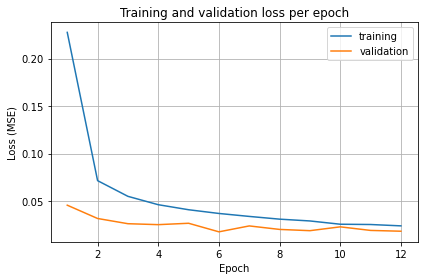

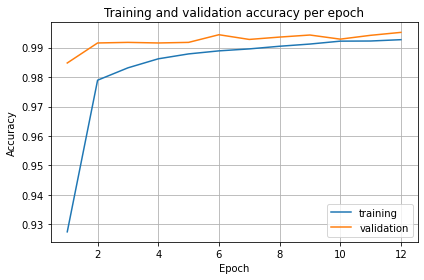

In [7]:
plt.figure('Training and validation loss history, no hidden')
plt.title('Training and validation loss per epoch')

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,label='training') # Training data error/epoch.
plt.plot(epochs,val_loss,label='validation') # Validation err/ep.model.save('my_model.h5')

plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.grid(True)
plt.tight_layout()
plt.legend()

plt.show()

plt.figure('Training and validation accuracy history, no hidden')
plt.title('Training and validation accuracy per epoch')

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(epochs,accuracy,label='training') # Training data error/epoch.
plt.plot(epochs,val_accuracy,label='validation') # Validation err/ep.

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.tight_layout()
plt.legend()

plt.show()


Program has correctly predicted  9952 out of 10000
Program has incorrectly predicted  48 out of 10000


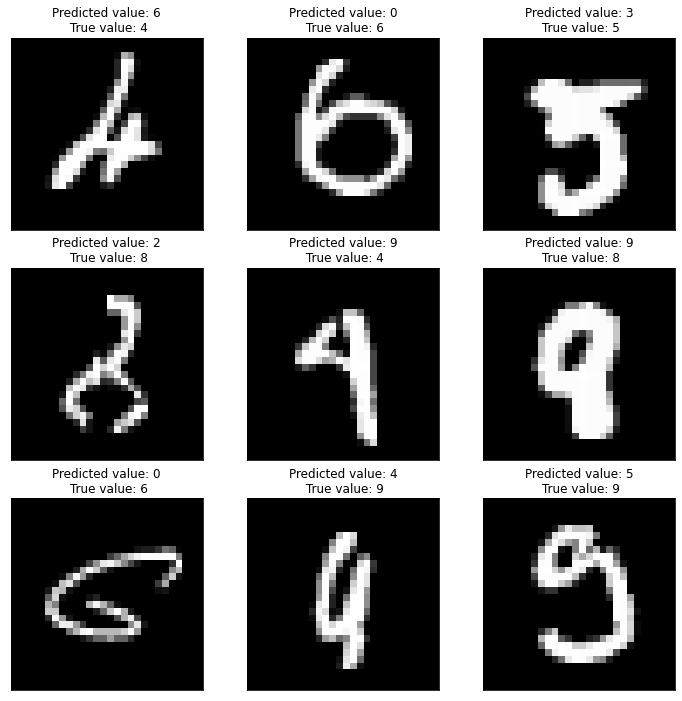

In [11]:
#predict = model.predict_classes(test_images_vector)
predict = np.argmax(model.predict(test_images_vector), axis=-1)

correct = np.nonzero(predict == test_labels)[0]
incorrect = np.nonzero(predict != test_labels)[0]
print("")
print("Program has correctly predicted ", len(correct), "out of", len(test_labels))
print("Program has incorrectly predicted ", len(incorrect), "out of", len(test_labels))

plt.figure(figsize=(12, 12))
## We can plot 9 of the images that the program has incorrectly predicted
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_images_vector[incorrect].reshape(28,28), cmap = 'gray', interpolation = 'none')
    plt.title('Predicted value: {}'.format(predict[incorrect]) + '\n' + ' True value: {}'.format(test_labels[incorrect]))
    plt.xticks([]) # Disable xticks
    plt.yticks([]) # Disable yticks
    #plt.plot()

plt.show()

In [9]:
## We can also test the performance of the network on the completely separate
## testing set.  We get over 99% accuracy.  Note that this is testing on
## unseen inputs, so is a true measure of performance.
print('')
print("Performance of network on testing set")
test_loss,test_acc = model.evaluate(test_images_vector,category_test_labels)
print("Accuracy on testing data: {:6.2f}%".format(test_acc*100))
print("Test error (loss):        {:8.4f}".format(test_loss))

## It is also interesting to see the accuracy reported on the training and
## validation data.  We expect that the accuracy from the test data will be
## the lowest (certainly no higher than the validation or training
## accuracies).

print('')
print("Performance of network:")
print("Accuracy on training data:   {:6.2f}%".format(history.history['accuracy'][-1]*100))
print("Accuracy on validation data: {:6.2f}%".format(history.history['val_accuracy'][-1]*100))
print("Accuracy on testing data:    {:6.2f}%".format(test_acc*100))



Performance of network on testing set
313/313 [==============================] - 2s 5ms/step - loss: 0.0184 - accuracy: 0.9952
Accuracy on testing data:  99.52%
Test error (loss):          0.0184

Performance of network:
Accuracy on training data:    99.27%
Accuracy on validation data:  99.52%
Accuracy on testing data:     99.52%
